### Consumo de energía y emisión de CO$_{2}$ en México
#### Análisis Exploratorio de Datos

Ejercicio sobre el análisis estadístico básico de los datos de emisión de bióxido de carbono por tipo de hidrocarburo (petróleo, gas y carbón). Los datos fueron tomado del Reporte Estadístico Anual de BP: https://on.bp.com/2WJKlva


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
energy = pd.read_csv('consumption_mexico.csv')
censo = pd.read_csv('poblacion.csv')

In [3]:
energy.columns

Index(['year', 'co2', 'e_coal', 'e_gas', 'e_oil', 'e_percap', 'energy_country',
       'oil_c', 'gas_c', 'coal_c'],
      dtype='object')

In [4]:
energy.describe(include='all')

,year,co2,e_coal,e_gas,e_oil,e_percap,energy_country,oil_c,gas_c,coal_c
count,54.000000,54.000000,34.000000,34.000000,34.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1991.500000,278.692963,21.757647,81.100294,62.815000,49.482222,110.632222,66.260741,30.842963,5.821296
std,15.732133,134.882874,10.269496,68.235078,17.928101,12.685701,52.867011,27.092232,20.525983,4.548347
min,1965.000000,62.120000,3.860000,7.210000,31.230000,23.430000,24.970000,15.340000,6.290000,0.690000
25%,1978.250000,168.902500,12.240000,19.595000,49.507500,41.527500,65.935000,44.182500,15.497500,2.255000
50%,1991.500000,278.780000,22.255000,60.230000,66.055000,53.355000,113.790000,78.255000,24.280000,3.385000
75%,2004.750000,409.762500,31.697500,142.352500,72.510000,59.697500,158.707500,88.970000,44.312500,10.252500
max,2018.000000,476.850000,34.450000,196.650000,96.580000,64.360000,189.300000,96.430000,76.950000,15.200000


In [5]:
t = np.arange(1910,2015,1)
pbl = np.interp(x = t, xp = censo['year'], fp = censo['people']) #población interpolada

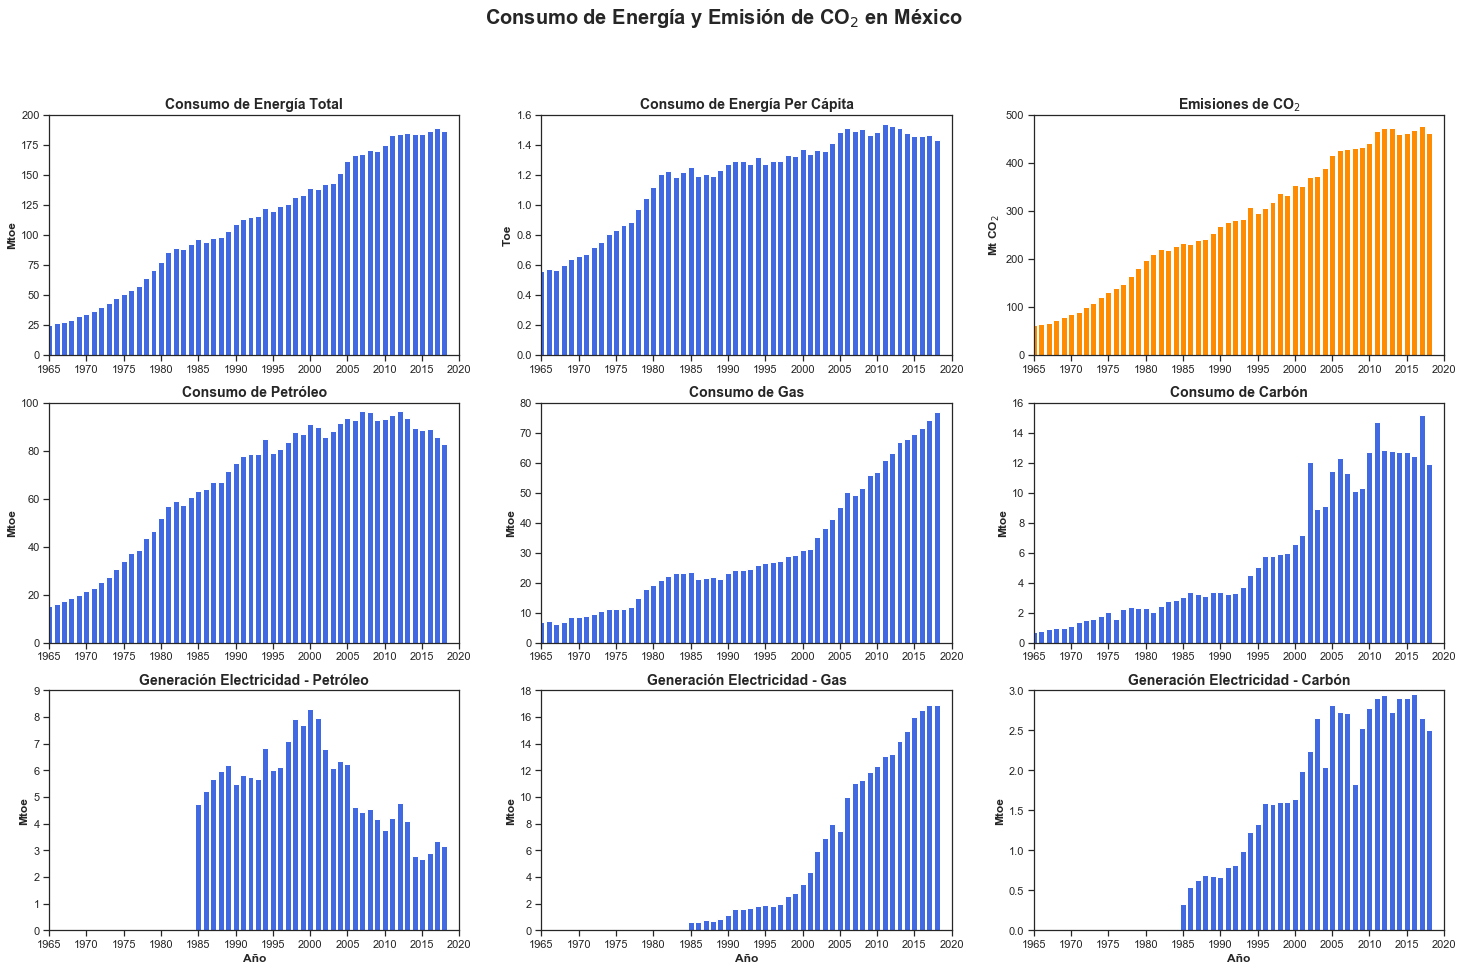

In [6]:
plt.figure(figsize=(25,15))
plt.suptitle('Consumo de Energía y Emisión de CO$_{2}$ en México', fontsize = 20, weight = 'bold')

plt.subplot(3,3,1)
plt.bar(energy['year'], energy['energy_country'], fill = True, width = 0.8, color = 'royalblue')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,200)
plt.title('Consumo de Energía Total', fontsize = 14, weight = 'bold')
#plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Mtoe', fontsize = 12, weight = 'bold')

plt.subplot(3,3,2)
epercap_toe = energy['e_percap'] * 0.02388
plt.bar(energy['year'], epercap_toe, fill = True, width = 0.8, color = 'royalblue')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,1.6)
plt.title('Consumo de Energía Per Cápita', fontsize = 14, weight = 'bold')
#plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Toe', fontsize = 12, weight = 'bold')

plt.subplot(3,3,3)
plt.bar(energy['year'], energy['co2'], fill = True, width = 0.8, color = 'darkorange')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,500)
plt.title('Emisiones de CO$_{2}$', fontsize = 14, weight = 'bold')
#plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Mt CO$_{2}$', fontsize = 12, weight = 'bold')

plt.subplot(3,3,4)
plt.bar(energy['year'], energy['oil_c'], fill = True, width = 0.8, color = 'royalblue')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,100)
plt.title('Consumo de Petróleo', fontsize = 14, weight = 'bold')
#plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Mtoe', fontsize = 12, weight = 'bold')

plt.subplot(3,3,5)
plt.bar(energy['year'], energy['gas_c'], fill = True, width = 0.8, color = 'royalblue')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,80)
plt.title('Consumo de Gas', fontsize = 14, weight = 'bold')
#plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Mtoe', fontsize = 12, weight = 'bold')

plt.subplot(3,3,6)
plt.bar(energy['year'], energy['coal_c'], fill = True, width = 0.8, color = 'royalblue')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,16)
plt.title('Consumo de Carbón', fontsize = 14, weight = 'bold')
#plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Mtoe', fontsize = 12, weight = 'bold')

plt.subplot(3,3,7)
plt.bar(energy['year'], energy['e_oil'] * 0.0859845228, fill = True, width = 0.8, color = 'royalblue')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,9)
plt.title('Generación Electricidad - Petróleo', fontsize = 14, weight = 'bold')
plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Mtoe', fontsize = 12, weight = 'bold')

plt.subplot(3,3,8)
plt.bar(energy['year'], energy['e_gas'] * 0.0859845228, fill = True, width = 0.8, color = 'royalblue')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,18)
plt.title('Generación Electricidad - Gas', fontsize = 14, weight = 'bold')
plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Mtoe', fontsize = 12, weight = 'bold')

plt.subplot(3,3,9)
plt.bar(energy['year'], energy['e_coal'] * 0.0859845228, fill = True, width = 0.8, color = 'royalblue')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylim(0,3)
plt.title('Generación Electricidad - Carbón', fontsize = 14, weight = 'bold')
plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.ylabel('Mtoe', fontsize = 12, weight = 'bold')

plt.show()

#### Conversión de Millones de Toneladas de Petróleo Equivalente a Millones de Toneladas de CO$_{2}$

In [7]:
co2_oil = energy['oil_c'] * 2.9
co2_gas = energy['gas_c'] * 2.1
co2_coal = energy['coal_c'] * 3.8

co2_goil = energy['e_oil'] * 0.0859845228 * 2.9
co2_ggas = energy['e_gas'] * 0.0859845228 * 2.1
co2_gcoal = energy['e_coal'] * 0.0859845228 * 3.8

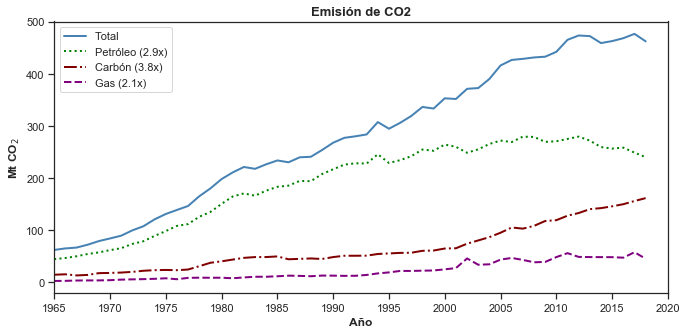

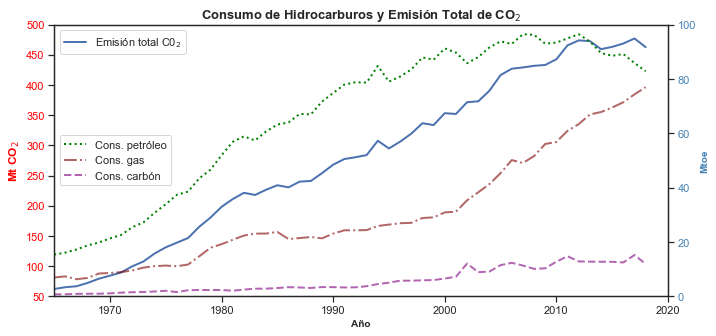

In [8]:
plt.figure(figsize=(11,5))

plt.plot(energy['year'], energy['co2'], '-', alpha = 1, label = 'Total', lw = 2, color = 'steelblue')
plt.plot(energy['year'], co2_oil, ':', alpha = 1, label = 'Petróleo (2.9x)', lw = 2, color = 'green')
plt.plot(energy['year'], co2_gas, '-.', alpha = 1, label = 'Carbón (3.8x)', lw = 2, color = 'maroon')
plt.plot(energy['year'], co2_coal, '--', alpha = 1, label = 'Gas (2.1x)', lw = 2, color = 'purple')
plt.xticks(np.round(np.linspace(1960,2020,13),0), rotation = 0)
plt.xlim(1965,2020)
plt.ylabel('Mt CO$_{2}$', fontsize = 12, weight = 'bold')
plt.xlabel('Año', fontsize = 12, weight = 'bold')
plt.title('Emisión de CO2', fontsize=13, weight = 'bold')
plt.legend(fontsize = 11, frameon = True, shadow = False)

fig, ax1 = plt.subplots(figsize=(11,5))

ax1.set_xlabel('Año', fontsize = 10, weight = 'bold')
ax1.set_ylabel('Mt CO$_{2}$', color = 'red', fontsize = 12, weight = 'bold')
ax1.plot(energy['year'], energy['co2'], lw = 2, alpha = 1, label = 'Emisión total C0$_{2}$')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylim(50,500)
ax1.legend(fontsize = 11, frameon = True, shadow = False, loc = 'upper left')

ax2 = ax1.twinx()

ax2.set_ylabel('Mtoe', fontsize = 10, color = 'steelblue', weight = 'bold')
ax2.plot(energy['year'], energy['oil_c'], lw = 2, alpha = 1, color = 'green', linestyle = ':', label = 'Cons. petróleo')
ax2.plot(energy['year'], energy['gas_c'], lw = 2, alpha = 0.6, color = 'maroon', linestyle = '-.', label = 'Cons. gas')
ax2.plot(energy['year'], energy['coal_c'], lw = 2, alpha = 0.6, color = 'purple', linestyle = '--', label = 'Cons. carbón')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2.set_ylim(0,100)
ax2.legend(fontsize = 11, frameon = True, shadow = False, loc = ('center left'))

plt.title('Consumo de Hidrocarburos y Emisión Total de CO$_{2}$', fontsize=13, weight = 'bold')
plt.xlim(1965,2020)

plt.show()

D:\Anaconda3\envs\Python-3.7\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


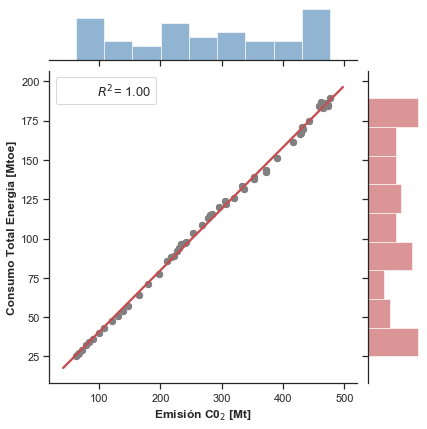

In [9]:
g = sns.JointGrid(x = "co2", y = "energy_country", data=energy)
g = g.plot_joint(sns.regplot, color = 'r')
g = g.plot_joint(plt.scatter, s = 40, color = '0.5', marker = 'o')

_ = g.ax_marg_y.hist(energy["energy_country"], color="r", alpha=.6,
                                                orientation="horizontal", bins=9)
_ = g.ax_marg_x.hist(energy["co2"], color="steelblue", alpha=.6,
                                                orientation="vertical", bins=9)
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}= {val:.2f}",
                stat="$R^2$", loc="upper left", fontsize=13)
_ = plt.xlabel('Emisión C0$_{2}$ [Mt]', fontsize = 12, weight = 'bold')
_ = plt.ylabel('Consumo Total Energía [Mtoe]', fontsize = 12, weight = 'bold')

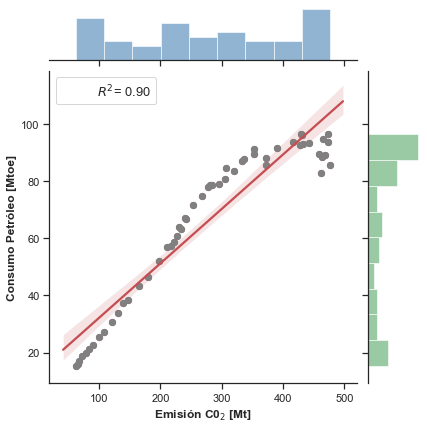

In [10]:
g = sns.JointGrid(x = "co2", y = "oil_c", data=energy)
g = g.plot_joint(sns.regplot, color = 'r')
g = g.plot_joint(plt.scatter, s = 40, color = '0.5', marker = 'o')

_ = g.ax_marg_y.hist(energy["oil_c"], color="g", alpha=.6,
                                                orientation="horizontal", bins=9)
_ = g.ax_marg_x.hist(energy["co2"], color="steelblue", alpha=.6,
                                                orientation="vertical", bins=9)
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}= {val:.2f}",
                stat="$R^2$", loc="upper left", fontsize=13)
_ = plt.xlabel('Emisión C0$_{2}$ [Mt]', fontsize = 12, weight = 'bold')
_ = plt.ylabel('Consumo Petróleo [Mtoe]', fontsize = 12, weight = 'bold')

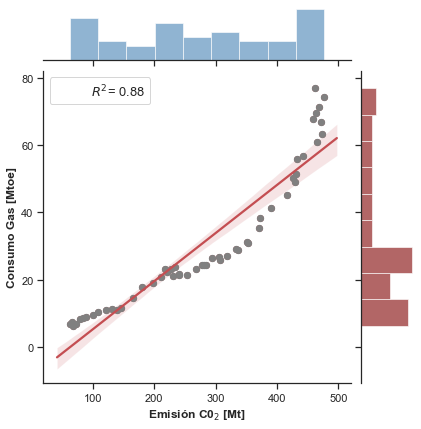

In [11]:
g = sns.JointGrid(x = "co2", y = "gas_c", data=energy)
g = g.plot_joint(sns.regplot, color = 'r')
g = g.plot_joint(plt.scatter, s = 40, color = '0.5', marker = 'o')

_ = g.ax_marg_y.hist(energy["gas_c"], color="maroon", alpha=.6,
                                                orientation="horizontal", bins=9)
_ = g.ax_marg_x.hist(energy["co2"], color="steelblue", alpha=.6,
                                                orientation="vertical", bins=9)
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}= {val:.2f}",
                stat="$R^2$", loc="upper left", fontsize=13)
_ = plt.xlabel('Emisión C0$_{2}$ [Mt]', fontsize = 12, weight = 'bold')
_ = plt.ylabel('Consumo Gas [Mtoe]', fontsize = 12, weight = 'bold')

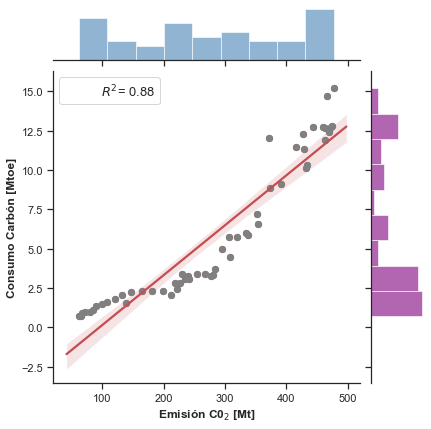

In [12]:
g = sns.JointGrid(x = "co2", y = "coal_c", data=energy)
g = g.plot_joint(sns.regplot, color = 'r')
g = g.plot_joint(plt.scatter, s = 40, color = '0.5', marker = 'o')

_ =g.ax_marg_y.hist(energy["coal_c"], color="purple", alpha=.6,
                                                orientation="horizontal", bins=9)
_ = g.ax_marg_x.hist(energy["co2"], color="steelblue", alpha=.6,
                                                orientation="vertical", bins=9)
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g = g.annotate(rsquare, template="{stat}= {val:.2f}",
                stat="$R^2$", loc="upper left", fontsize=13)
_ = plt.xlabel('Emisión C0$_{2}$ [Mt]', fontsize = 12, weight = 'bold')
_ = plt.ylabel('Consumo Carbón [Mtoe]', fontsize = 12, weight = 'bold')

In [13]:
epn_time = energy['year'][48:54]
epn_c02 = energy['co2'][48:54]
epn_ge = energy['e_oil'][48:54] + energy['e_gas'][48:54] + energy['e_coal'][48:54] 
epn_oil = co2_oil[48:54]
epn_gas = co2_gas[48:54]
epn_coal = co2_coal[48:54]
epn_goil = co2_goil[48:54]
epn_ggas = co2_ggas[48:54]
epn_gcoal = co2_gcoal[48:54]
epn_totalx = np.sum(epn_c02)
epn_oilx = (100 * np.sum(epn_oil))/np.sum(epn_c02)
epn_gasx = (100 * np.sum(epn_gas))/np.sum(epn_c02)
epn_coalx = (100 * np.sum(epn_coal))/np.sum(epn_c02)
epn_goilx = (100 * np.sum(epn_goil))/np.sum(epn_ge)
epn_ggasx = (100 * np.sum(epn_ggas))/np.sum(epn_ge)
epn_gcoalx = (100 * np.sum(epn_gcoal))/np.sum(epn_ge)

fch_time = energy['year'][42:48]
fch_c02 = energy['co2'][42:48]
fch_ge = energy['e_oil'][42:48] + energy['e_gas'][42:48] + energy['e_coal'][42:48]
fch_oil = co2_oil[42:48]
fch_gas = co2_gas[42:48]
fch_coal = co2_coal[42:48]
fch_goil = co2_goil[42:48]
fch_ggas = co2_ggas[42:48]
fch_gcoal = co2_gcoal[42:48]
fch_totalx = np.sum(epn_c02)
fch_oilx = (100 * np.sum(fch_oil))/np.sum(fch_c02)
fch_gasx = (100 * np.sum(fch_gas))/np.sum(fch_c02)
fch_coalx = (100 * np.sum(fch_coal))/np.sum(fch_c02)
fch_goilx = (100 * np.sum(fch_goil))/np.sum(fch_ge)
fch_ggasx = (100 * np.sum(fch_ggas))/np.sum(fch_ge)
fch_gcoalx = (100 * np.sum(fch_gcoal))/np.sum(fch_ge)

vfq_time = energy['year'][36:42]
vfq_c02 = energy['co2'][36:42]
vfq_ge = energy['e_oil'][36:42] + energy['e_gas'][36:42] + energy['e_coal'][36:42]
vfq_oil = co2_oil[36:42]
vfq_gas = co2_gas[36:42]
vfq_coal = co2_coal[36:42]
vfq_goil = co2_goil[36:42]
vfq_ggas = co2_ggas[36:42]
vfq_gcoal = co2_gcoal[36:42]
vfq_totalx = np.sum(vfq_c02)
vfq_oilx = (100 * np.sum(vfq_oil))/np.sum(vfq_c02)
vfq_gasx = (100 * np.sum(vfq_gas))/np.sum(vfq_c02)
vfq_coalx = (100 * np.sum(vfq_coal))/np.sum(vfq_c02)
vfq_goilx = (100 * np.sum(vfq_goil))/np.sum(vfq_ge)
vfq_ggasx = (100 * np.sum(vfq_ggas))/np.sum(vfq_ge)
vfq_gcoalx = (100 * np.sum(vfq_gcoal))/np.sum(vfq_ge)

ezp_time = energy['year'][30:36]
ezp_c02 = energy['co2'][30:36]
ezp_ge = energy['e_oil'][30:36] + energy['e_gas'][30:36] + energy['e_coal'][30:36]
ezp_oil = co2_oil[30:36]
ezp_gas = co2_gas[30:36]
ezp_coal = co2_coal[30:36]
ezp_oilx = (100 * np.sum(ezp_oil))/np.sum(ezp_c02)
ezp_gasx = (100 * np.sum(ezp_gas))/np.sum(ezp_c02)
ezp_coalx = (100 * np.sum(ezp_coal))/np.sum(ezp_c02)
ezp_goil = co2_goil[30:36]
ezp_ggas = co2_ggas[30:36]
ezp_gcoal = co2_gcoal[30:36]
ezp_goilx = (100 * np.sum(ezp_goil))/np.sum(ezp_ge)
ezp_ggasx = (100 * np.sum(ezp_ggas))/np.sum(ezp_ge)
ezp_gcoalx = (100 * np.sum(ezp_gcoal))/np.sum(ezp_ge)

csg_time = energy['year'][24:30]
csg_c02 = energy['co2'][24:30]
csg_ge = energy['e_oil'][24:30] + energy['e_gas'][24:30] + energy['e_coal'][24:30]
csg_oil = co2_oil[24:30]
csg_gas = co2_gas[24:30]
csg_coal = co2_coal[24:30]
csg_oilx = (100 * np.sum(csg_oil))/np.sum(csg_c02)
csg_gasx = (100 * np.sum(csg_gas))/np.sum(csg_c02)
csg_coalx = (100 * np.sum(csg_coal))/np.sum(csg_c02)
csg_goil = co2_goil[24:30]
csg_ggas = co2_ggas[24:30]
csg_gcoal = co2_gcoal[24:30]
csg_goilx = (100 * np.sum(csg_goil))/np.sum(csg_ge)
csg_ggasx = (100 * np.sum(csg_ggas))/np.sum(csg_ge)
csg_gcoalx = (100 * np.sum(csg_gcoal))/np.sum(csg_ge)

mmh_time = energy['year'][18:24]
mmh_c02 = energy['co2'][18:24]
mmh_ge = energy['e_oil'][18:24] + energy['e_gas'][18:24] + energy['e_coal'][18:24]
mmh_oil = co2_oil[18:24]
mmh_gas = co2_gas[18:24]
mmh_coal = co2_coal[18:24]
mmh_oilx = (100 * np.sum(mmh_oil))/np.sum(mmh_c02)
mmh_gasx = (100 * np.sum(mmh_gas))/np.sum(mmh_c02)
mmh_coalx = (100 * np.sum(mmh_coal))/np.sum(mmh_c02)
mmh_goil = co2_goil[18:24]
mmh_ggas = co2_ggas[18:24]
mmh_gcoal = co2_gcoal[18:24]
mmh_goilx = (100 * np.sum(mmh_goil))/np.sum(mmh_ge)
mmh_ggasx = (100 * np.sum(mmh_ggas))/np.sum(mmh_ge)
mmh_gcoalx = (100 * np.sum(mmh_gcoal))/np.sum(mmh_ge)

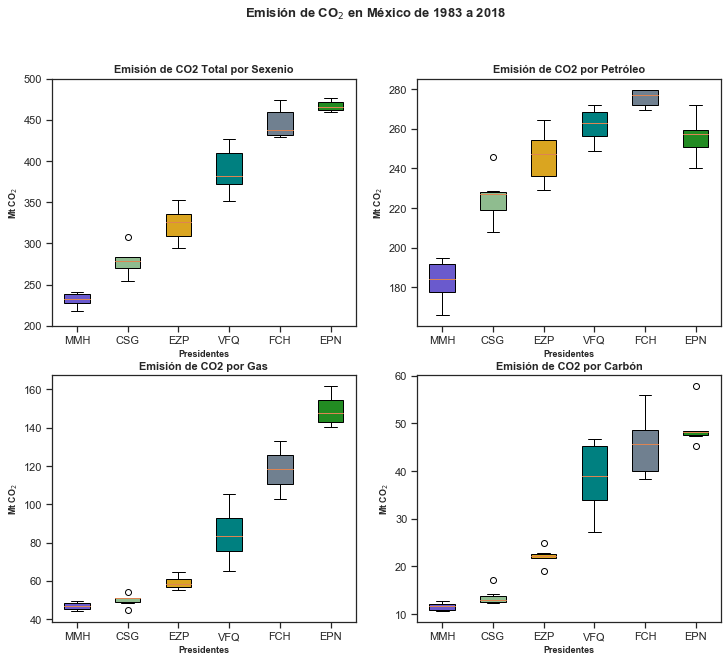

In [14]:
plt.figure(figsize=(12,10))
plt.suptitle('Emisión de CO$_{2}$ en México de 1983 a 2018', fontsize = 13, weight = 'bold')

plt.subplot(2,2,1)
boxplot = [mmh_c02, csg_c02, ezp_c02, vfq_c02, fch_c02, epn_c02]
plot = plt.boxplot(boxplot, patch_artist=True, labels=['MMH','CSG','EZP','VFQ','FCH','EPN'])
colors = ['slateblue', 'darkseagreen', 'goldenrod', 'teal', 'slategray', 'forestgreen']
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Mt CO$_{2}$', fontsize = 9, weight = 'bold')
plt.xlabel('Presidentes', fontsize = 9, weight = 'bold')
plt.ylim(200,500)
plt.title('Emisión de CO2 Total por Sexenio', fontsize=11, weight = 'bold')

plt.subplot(2,2,2)
boxplot = [mmh_oil, csg_oil, ezp_oil, vfq_oil, fch_oil, epn_oil]
plot = plt.boxplot(boxplot, patch_artist=True, labels=['MMH','CSG','EZP','VFQ','FCH','EPN'])
colors = ['slateblue', 'darkseagreen', 'goldenrod', 'teal', 'slategray', 'forestgreen']
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Mt CO$_{2}$', fontsize = 9, weight = 'bold')
plt.xlabel('Presidentes', fontsize = 9, weight = 'bold')
plt.title('Emisión de CO2 por Petróleo', fontsize=11, weight = 'bold')

plt.subplot(2,2,3)
boxplot = [mmh_gas, csg_gas, ezp_gas, vfq_gas, fch_gas, epn_gas]
plot = plt.boxplot(boxplot, patch_artist=True, labels=['MMH','CSG','EZP','VFQ','FCH','EPN'])
colors = ['slateblue', 'darkseagreen', 'goldenrod', 'teal', 'slategray', 'forestgreen']
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Mt CO$_{2}$', fontsize = 9, weight = 'bold')
plt.xlabel('Presidentes', fontsize = 9, weight = 'bold')
plt.title('Emisión de CO2 por Gas', fontsize=11, weight = 'bold')

plt.subplot(2,2,4)
boxplot = [mmh_coal, csg_coal, ezp_coal, vfq_coal, fch_coal, epn_coal]
plot = plt.boxplot(boxplot, patch_artist=True, labels=['MMH','CSG','EZP','VFQ','FCH','EPN'])
colors = ['slateblue', 'darkseagreen', 'goldenrod', 'teal', 'slategray', 'forestgreen']
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
plt.ylabel('Mt CO$_{2}$', fontsize = 9, weight = 'bold')
plt.xlabel('Presidentes', fontsize = 9, weight = 'bold')
plt.title('Emisión de CO2 por Carbón', fontsize=11, weight = 'bold')

plt.show()

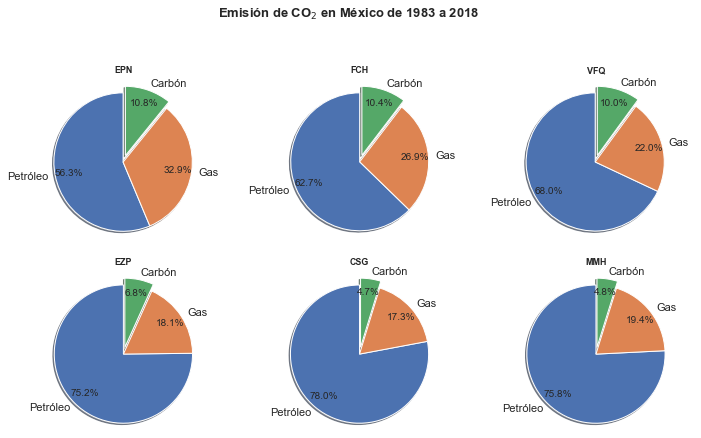

In [15]:
plt.figure(figsize=(12,10))
plt.suptitle('Emisión de CO$_{2}$ en México de 1983 a 2018', fontsize = 13, weight = 'bold')

malla = GridSpec(3, 3)

labels = 'Petróleo', 'Gas', 'Carbón'
explode = (0, 0, 0.1)

plt.subplot(malla[0, 0], aspect=1)
sizes = [epn_oilx, epn_gasx, epn_coalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal') 
plt.title('EPN', fontsize=9, weight = 'bold')

plt.subplot(malla[0, 1], aspect=1)
sizes = [fch_oilx, fch_gasx, fch_coalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('FCH', fontsize=9, weight = 'bold')

plt.subplot(malla[0, -1], aspect=1)
sizes = [vfq_oilx, vfq_gasx, vfq_coalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('VFQ', fontsize=9, weight = 'bold')

plt.subplot(malla[1, 0], aspect=1)
sizes = [ezp_oilx, ezp_gasx, ezp_coalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('EZP', fontsize=9, weight = 'bold')

plt.subplot(malla[1, 1], aspect=1)
sizes = [csg_oilx, csg_gasx, csg_coalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('CSG', fontsize=9, weight = 'bold')

plt.subplot(malla[1, -1], aspect=1)
sizes = [mmh_oilx, mmh_gasx, mmh_coalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('MMH', fontsize=9, weight = 'bold')

plt.show()

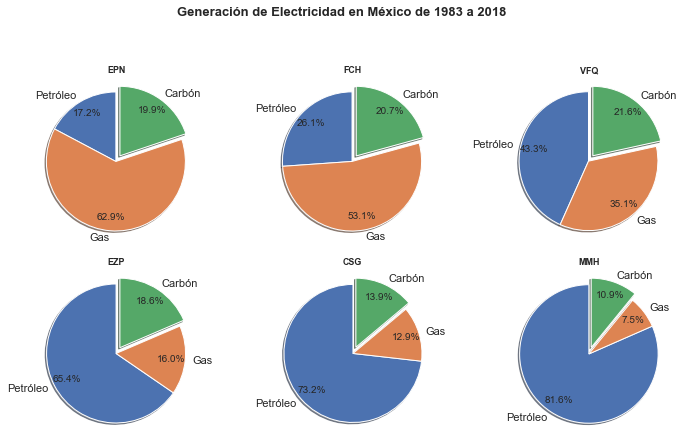

In [16]:
plt.figure(figsize=(12,10))
plt.suptitle('Generación de Electricidad en México de 1983 a 2018', fontsize = 13, weight = 'bold')

malla = GridSpec(3, 3)

labels = 'Petróleo', 'Gas', 'Carbón'
explode = (0, 0, 0.1)

plt.subplot(malla[0, 0], aspect=1)
sizes = [epn_goilx, epn_ggasx, epn_gcoalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('EPN', fontsize=9, weight = 'bold')

plt.subplot(malla[0, 1], aspect=1)
sizes = [fch_goilx, fch_ggasx, fch_gcoalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('FCH', fontsize=9, weight = 'bold')

plt.subplot(malla[0, -1], aspect=1)
sizes = [vfq_goilx, vfq_ggasx, vfq_gcoalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('VFQ', fontsize=9, weight = 'bold')

plt.subplot(malla[1, 0], aspect=1)
sizes = [ezp_goilx, ezp_ggasx, ezp_gcoalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('EZP', fontsize=9, weight = 'bold')

plt.subplot(malla[1, 1], aspect=1)
sizes = [csg_goilx, csg_ggasx, csg_gcoalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('CSG', fontsize=9, weight = 'bold')


plt.subplot(malla[1, -1], aspect=1)
sizes = [mmh_goilx, mmh_ggasx, mmh_gcoalx]
plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance = 0.8)
plt.axis('equal')
plt.title('MMH', fontsize=9, weight = 'bold')

plt.show()